In [14]:
import os
import sys
import pandas as pd

# Add the paths to the sys.path
sys.path.append('C:/Users/MMM/Documents/10 Academy File/KAIM-Week-2/Db_connection')
sys.path.append('C:/Users/MMM/Documents/10 Academy File/KAIM-Week-2/src')

# Now, you can import your custom modules
from connection import Postgres_Connection
from utils import missing_values_table, convert_bytes_to_megabytes




In [15]:
db = Postgres_Connection(dbname='my_database', user='postgres', password='123')
db.connect()

# Example query
query = "SELECT * FROM public.xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()


Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [16]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Missing Values in df:
                                          Missing Values  Percentage
Nb of sec with 37500B < Vol UL                    130254   86.835421
Nb of sec with 6250B < Vol UL < 37500B            111843   74.561503
Nb of sec with 125000B < Vol DL                    97538   65.024900
TCP UL Retrans. Vol (Bytes)                        96649   64.432237
Nb of sec with 31250B < Vol DL < 125000B           93586   62.390251
Nb of sec with 1250B < Vol UL < 6250B              92894   61.928920
Nb of sec with 6250B < Vol DL < 31250B             88317   58.877607
TCP DL Retrans. Vol (Bytes)                        88146   58.763608
HTTP UL (Bytes)                                    81810   54.539636
HTTP DL (Bytes)                                    81474   54.315638
Avg RTT DL (ms)                                    27829   18.552543
Avg RTT UL (ms)                                    27812   18.541210
Last Location Name                                  1153    0.768662
MSISDN/Numbe

In [17]:
df['x'] = df['HTTP DL (Bytes)'].apply(convert_bytes_to_megabytes)
print(df)


           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

Missing Values & Outliers

Missing Values:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps

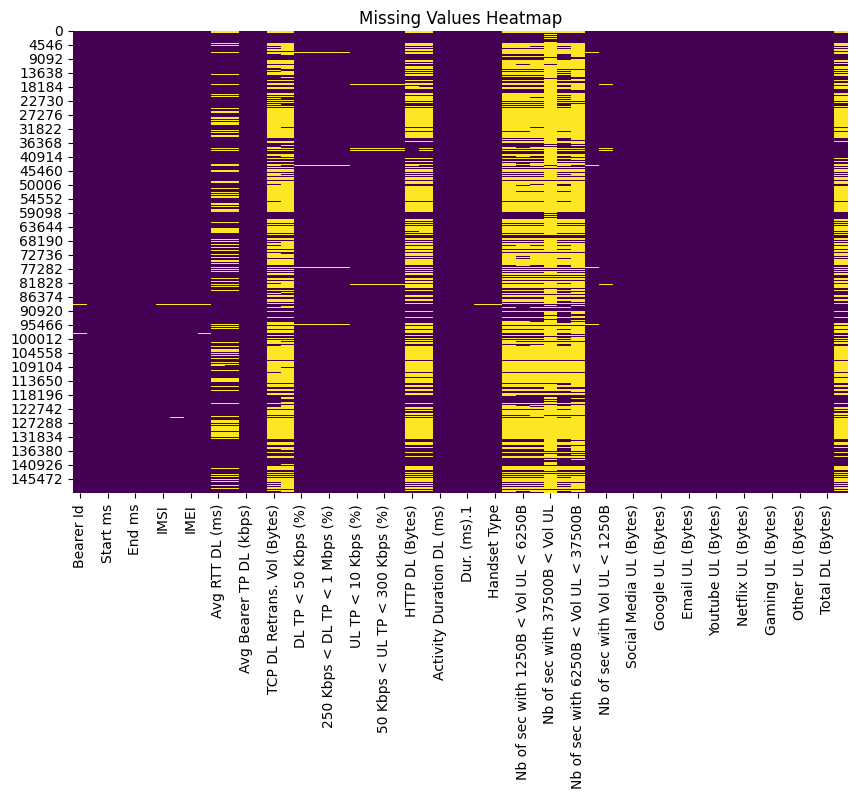

In [18]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [38]:
# Print the column names and their data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

1.2 Treat Missing Values:

In [31]:
# Treat missing values for numerical columns by replacing with mean
df_numeric = df.select_dtypes(include=['float64', 'int64'])

for column in df_numeric.columns:
    df[column].fillna(df[column].mean(), inplace=True)

print("Missing values filled with mean.")


C:\Users\MMM\AppData\Local\Temp\ipykernel_2232\1497327293.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Missing values filled with mean.


1.3 Detect Outliers:

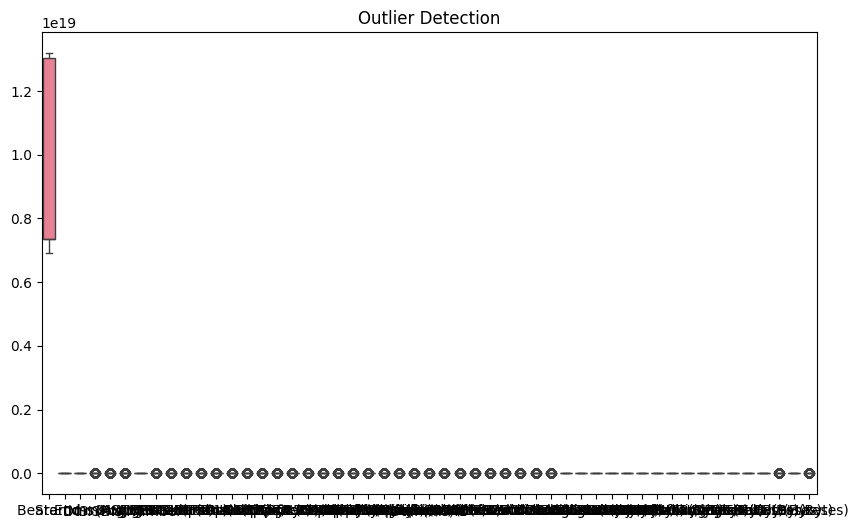

In [20]:
# Detect outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()


2. Describe Relevant Variables & Data Types

In [39]:
# Print the first few rows of the DataFrame
print(df.head())


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

In [21]:
# Describe the relevant variables
print(df.info())  # Check data types
print(df.describe())  # Get summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

3. Segment Users into Decile Classes


In [40]:
# List of columns you expect
expected_columns = ['total_DL', 'total_UL', 'total_duration', 'Social Media', 'Google', 'YouTube', 'Netflix', 'Gaming', 'Other']

# Check which expected columns are present in the DataFrame
missing_columns = [col for col in expected_columns if col not in df.columns]
print("Missing Columns:", missing_columns)


Missing Columns: ['total_DL', 'total_UL', 'total_duration', 'Social Media', 'Google', 'YouTube', 'Netflix', 'Gaming', 'Other']


4. Basic Metrics (Mean, Median, etc.)

In [25]:
df.describe()


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),x
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05,68527.000000
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,109.168044
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08,918.573912
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,0.000000
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08,0.110000
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08,1.850000
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08,23.880000
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,69170.600000


In [41]:
# Print the number of missing values for each column
print(df.isnull().sum())


Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [45]:
# Compute and visualize the correlation matrix
relevant_columns = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']

# Ensure these columns exist
if all(col in df.columns for col in relevant_columns):
    correlation_matrix = df[relevant_columns].corr()

    # Visualize the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Application Usage Correlation Matrix")
    plt.show()
else:
    print("Error: One or more relevant columns not found.")


Error: One or more relevant columns not found.


In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the relevant application columns for PCA
relevant_columns = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']

# Ensure these columns exist
if all(col in df.columns for col in relevant_columns):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[relevant_columns])

    # Apply PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)

    # Add PCA results to DataFrame
    df['PC1'] = principal_components[:, 0]
    df['PC2'] = principal_components[:, 1]

    print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
else:
    print("Error: One or more relevant columns not found.")


Error: One or more relevant columns not found.
